# Classification version

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import kruskal, wilcoxon, f_oneway

sns.set_theme(style="whitegrid", font_scale=1.5, context="paper")

In [2]:
def plot_data(data_symp, data_meta, data_all, title):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for data, label, linestyle in zip(
        [
            data_symp["Statistical Parity"].values,
            data_meta["Statistical Parity"].values,
            data_all["Statistical Parity"].values,
        ],
        ["Symptoms", "Metafeatures", "Both"],
        ["-", "--", "dotted"],
    ):
        ax[0].plot(data, label=label, linestyle=linestyle)

    for data, label, linestyle in zip(
        [
            data_symp["Equal Opportunity"].values,
            data_meta["Equal Opportunity"].values,
            data_all["Equal Opportunity"].values,
        ],
        ["Symptoms", "Metafeatures", "Both"],
        ["-", "--", "dotted"],
    ):
        ax[1].plot(data, label=label, linestyle=linestyle)

    for data, label, linestyle in zip(
        [
            data_symp["Average Odds"].values,
            data_meta["Average Odds"].values,
            data_all["Average Odds"].values,
        ],
        ["Symptoms", "Metafeatures", "Both"],
        ["-", "--", "dotted"],
    ):
        ax[2].plot(data, label=label, linestyle=linestyle)

    ax[0].set_title("Statistical Parity")
    ax[1].set_title("Equal Opportunity")
    ax[2].set_title("Average Odds")
    plt.tight_layout()
    plt.legend(
        loc="lower right",
        bbox_to_anchor=(-0.1, -0.2),
        ncol=3,
    )
    plt.suptitle(title)
    # plt.subplots_adjust(wspace=0.3, hspace=0.3)
    # plt.tight_layout()
    # plt.savefig(os.path.join("figs", title + ".pdf"))
    # plt.savefig(os.path.join("figs", title + ".png"), dpi=300)
    plt.show()


def models_comparison(data, title):
    fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
    bar1 = sns.boxplot(
        y="Statistical Parity",
        x="Model",
        hue="Model",
        data=data,
        ax=ax[0],
        legend=False,
    )
    bar2 = sns.boxplot(
        y="Equal Opportunity",
        x="Model",
        hue="Model",
        data=data,
        ax=ax[1],
        legend=False,
    )
    bar3 = sns.boxplot(
        y="Average Odds",
        x="Model",
        hue="Model",
        data=data,
        ax=ax[2],
        legend=False,
    )

    # Set hatch for each bar
    # hatches = ["/", "\\", "o", "|", "*"]
    # for i, bar in enumerate(bar1.patches):
    #     bar.set_hatch(hatches[i % len(hatches)])
    # for i, bar in enumerate(bar2.patches):
    #     bar.set_hatch(hatches[i % len(hatches)])
    # for i, bar in enumerate(bar3.patches):
    #     bar.set_hatch(hatches[i % len(hatches)])

    ax[0].set_title("Statistical Parity")
    ax[1].set_title("Equal Opportunity")
    ax[2].set_title("Average Odds")
    ax[0].set_ylabel(title)
    ax[1].set_ylabel("")
    ax[2].set_ylabel("")
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".pdf"))
    plt.savefig(os.path.join("figs", title + ".png"), dpi=300)

    plt.show()


def data_comparison(symp, meta, all, title):
    stat_par = pd.DataFrame(
        {
            "Symp": symp["Statistical Parity"],
            "Meta": meta["Statistical Parity"],
            "Both": all["Statistical Parity"],
        }
    )
    equal_opp = pd.DataFrame(
        {
            "Symp": symp["Equal Opportunity"],
            "Meta": meta["Equal Opportunity"],
            "Both": all["Equal Opportunity"],
        }
    )

    avg_odds = pd.DataFrame(
        {
            "Symp": symp["Average Odds"],
            "Meta": meta["Average Odds"],
            "Both": all["Average Odds"],
        }
    )
    fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
    sns.boxplot(data=stat_par, ax=ax[0])
    sns.boxplot(data=equal_opp, ax=ax[1])
    sns.boxplot(data=avg_odds, ax=ax[2])
    ax[0].set_title("Statistical parity")
    ax[1].set_title("Equal opportunity")
    ax[2].set_title("Average odds")
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(f"figs/data_evaluation_{title}.png", dpi=300)
    plt.show()

## MLP Classifier

In [4]:
mlp_symp = pd.read_csv("scores/mlp/mlp_acc_scores_bias_symptoms_class.csv", index_col=0)
mlp_meta = pd.read_csv("scores/mlp/mlp_acc_scores_metafeatures_class.csv", index_col=0)
mlp_all = pd.read_csv("scores/mlp/mlp_acc_scores_all_features_class.csv", index_col=0)

In [5]:
wilcoxon(mlp_symp["Statistical Parity"], mlp_meta["Statistical Parity"])

WilcoxonResult(statistic=0.0, pvalue=0.0625)

In [6]:
wilcoxon(mlp_all["Statistical Parity"], mlp_meta["Statistical Parity"])

WilcoxonResult(statistic=1.0, pvalue=0.125)

In [7]:
kruskal(
    mlp_symp["Statistical Parity"],
    mlp_meta["Statistical Parity"],
    mlp_all["Statistical Parity"],
)

KruskalResult(statistic=8.795706618962434, pvalue=0.01230372386119856)

In [19]:
kruskal(mlp_symp["Equal Opportunity"], mlp_meta["Equal Opportunity"], mlp_all["Equal Opportunity"])

KruskalResult(statistic=0.095169946332743, pvalue=0.9535294452738848)

In [6]:
kruskal(mlp_symp["Average Odds"], mlp_meta["Average Odds"], mlp_all["Average Odds"])

KruskalResult(statistic=1.144086021505377, pvalue=0.5643712435653472)

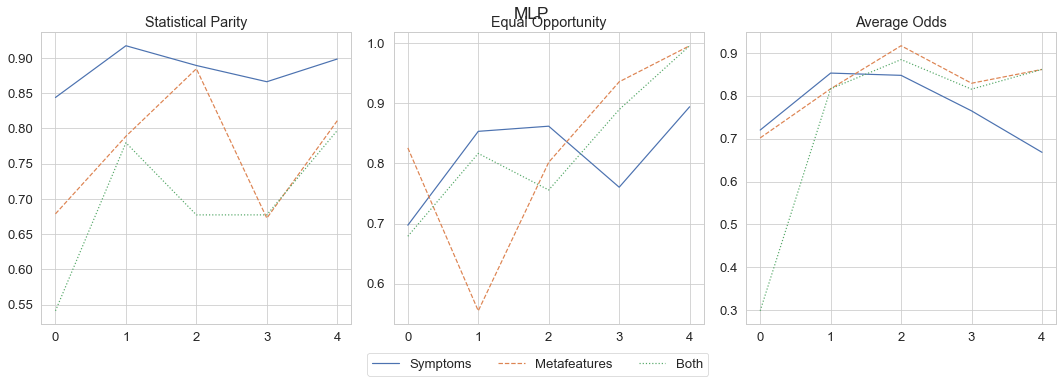

In [8]:
plot_data(mlp_symp, mlp_meta, mlp_all, "MLP")

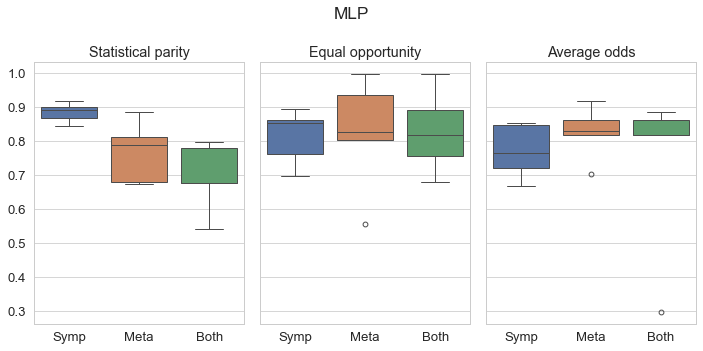

In [6]:
data_comparison(mlp_symp, mlp_meta, mlp_all, 'MLP')

## Random Forest Classifier

In [9]:
rf_symp = pd.read_csv("scores/rf/rf_acc_scores_bias_symptoms_class.csv", index_col=0)
rf_meta = pd.read_csv("scores/rf/rf_acc_scores_metafeatures_class.csv", index_col=0)
rf_all = pd.read_csv("scores/rf/rf_acc_scores_all_features_class.csv", index_col=0)

In [14]:
wilcoxon(rf_all["Statistical Parity"], rf_symp["Statistical Parity"])

WilcoxonResult(statistic=7.0, pvalue=1.0)

In [9]:
kruskal(rf_symp["Statistical Parity"], rf_meta["Statistical Parity"], rf_all["Statistical Parity"])

KruskalResult(statistic=5.539999999999999, pvalue=0.06266200474215318)

In [10]:
kruskal(rf_symp["Equal Opportunity"], rf_meta["Equal Opportunity"], rf_all["Equal Opportunity"])

KruskalResult(statistic=0.586046511627915, pvalue=0.7460047915468443)

In [11]:
kruskal(rf_symp["Average Odds"], rf_meta["Average Odds"], rf_all["Average Odds"])

KruskalResult(statistic=4.372808586762084, pvalue=0.11231989277079728)

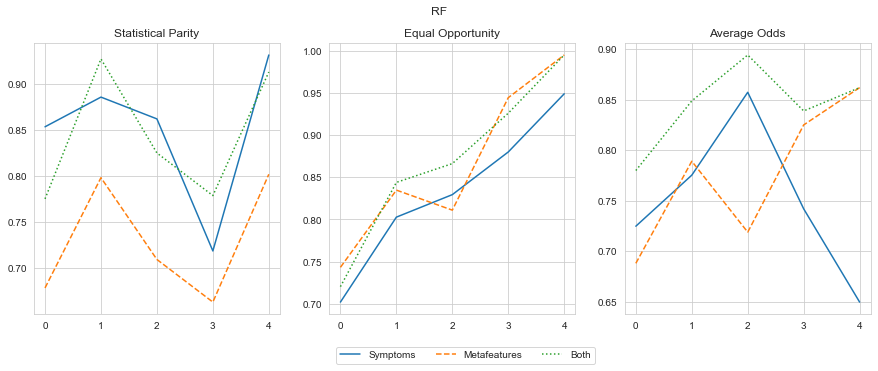

In [45]:
plot_data(rf_symp, rf_meta, rf_all, "RF")

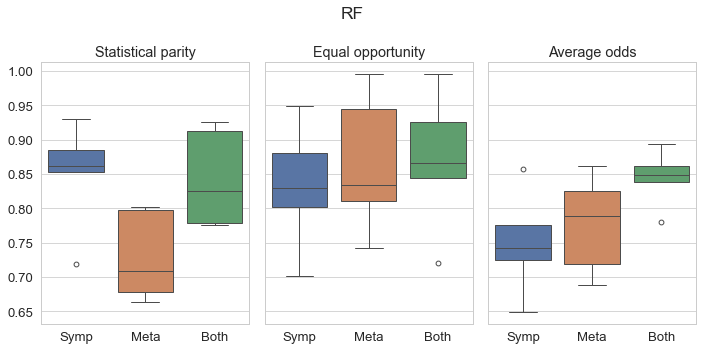

In [9]:
data_comparison(rf_symp, rf_meta, rf_all, "RF")

## XGB Classifier

In [12]:
xgb_symp = pd.read_csv("scores/xgb/xgb_acc_scores_bias_symptoms_class.csv", index_col=0)
xgb_meta = pd.read_csv("scores/xgb/xgb_acc_scores_metafeatures_class.csv", index_col=0)
xgb_all = pd.read_csv("scores/xgb/xgb_acc_scores_all_features_class.csv", index_col=0)

In [13]:
kruskal(xgb_symp["Statistical Parity"], xgb_meta["Statistical Parity"], xgb_all["Statistical Parity"])

KruskalResult(statistic=10.839355992844371, pvalue=0.0044285724344334965)

In [14]:
kruskal(xgb_symp["Equal Opportunity"], xgb_meta["Equal Opportunity"], xgb_all["Equal Opportunity"])

KruskalResult(statistic=0.8164579606440049, pvalue=0.664826629176356)

In [15]:
kruskal(xgb_symp["Average Odds"], xgb_meta["Average Odds"], xgb_all["Average Odds"])

KruskalResult(statistic=3.5, pvalue=0.1737739434504451)

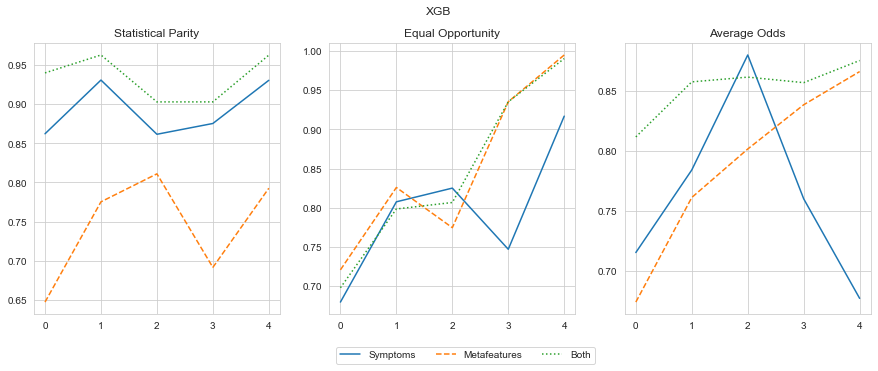

In [30]:
plot_data(xgb_symp, xgb_meta, xgb_all, "XGB")

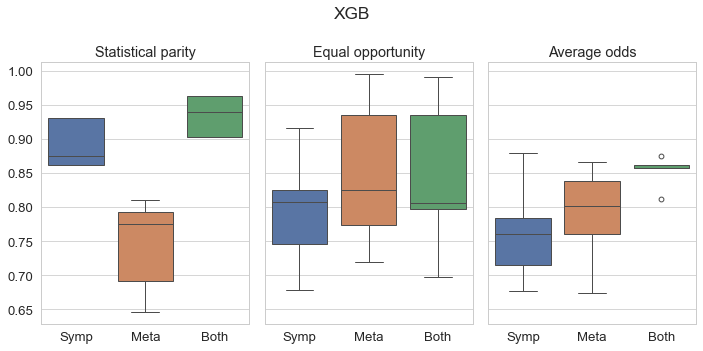

In [12]:
data_comparison(xgb_symp, xgb_meta, xgb_all, "XGB")

## Comparison of all models

In [13]:
mlp_symp['Model'] = 'MLP'
rf_all['Model'] = 'RF'
xgb_all['Model'] = 'XGB'

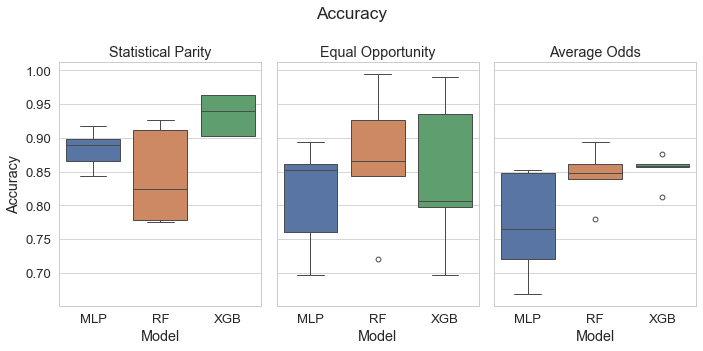

In [14]:
models_comparison(pd.concat([mlp_symp, rf_all, xgb_all]), "Accuracy")

In [15]:
mlp_f1 = pd.read_csv("scores/mlp/mlp_f1_scores_bias_symptoms_class.csv")
rf_f1 = pd.read_csv("scores/rf/rf_f1_scores_all_features_class.csv")
xgb_f1 = pd.read_csv("scores/xgb/xgb_f1_scores_all_features_class.csv")

In [16]:
mlp_f1['Model'] = 'MLP'
rf_f1['Model'] = 'RF'
xgb_f1['Model'] = 'XGB'

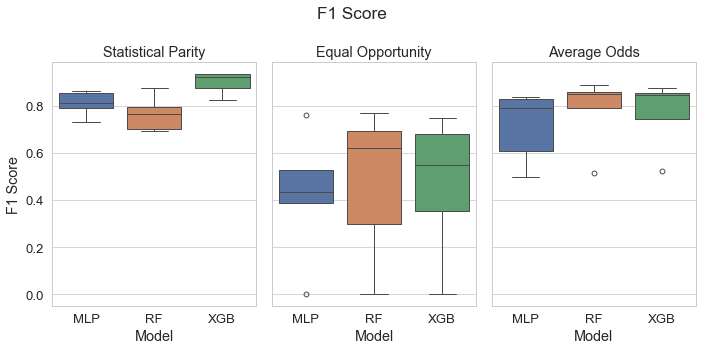

In [17]:
models_comparison(pd.concat([mlp_f1, rf_f1, xgb_f1]), 'F1 Score')

## Evaluation on new data

In [73]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, RocCurveDisplay, PrecisionRecallDisplay
import numpy as np
import joblib

In [135]:
data = pd.read_csv('data/all_features_class.csv', index_col=[0,1])

In [86]:
train, test = train_test_split(data, test_size=0.3, shuffle=False)

In [87]:
xgb_model = joblib.load('all_features_class_xgb.joblib')
rf_model = joblib.load('all_features_class_rf.joblib')
mlp_model = joblib.load('bias_symptoms_class_mlp.joblib')

C:\Users\giord\miniconda3\envs\bias\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\giord\miniconda3\envs\bias\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\giord\miniconda3\envs\bias\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.3 when using version 1.0.1. This mi

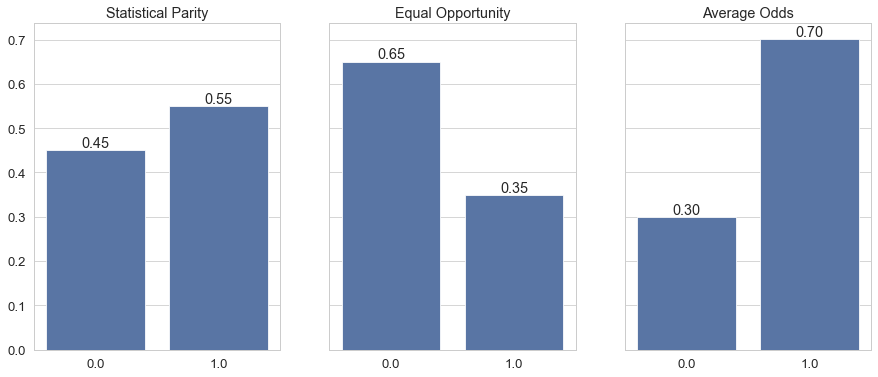

In [139]:
fig, ax = plt.subplots(1,3,figsize=(15,6), sharey=True)
#data["statistical_parity"].value_counts(normalize=True).plot(kind='bar', ax=ax[0])
sns.barplot(data=data["statistical_parity"].value_counts(normalize=True), ax=ax[0])
ax[0].set_title('Statistical Parity')
ax[0].bar_label(ax[0].containers[0], fmt="%.2f")
ax[0].set_ylabel('')
sns.barplot(data=data["equal_opportunity"].value_counts(normalize=True), ax=ax[1])
ax[1].set_title('Equal Opportunity')
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
sns.barplot(data=data["average_odds"].value_counts(normalize=True), ax=ax[2])
ax[2].set_title('Average Odds')
ax[2].bar_label(ax[2].containers[0], fmt="%.2f")
plt.savefig('figs/classes_distribution.png', dpi=300)

In [103]:
data["equal_opportunity"].value_counts(normalize=True)

0.0    0.650373
1.0    0.349627
Name: equal_opportunity, dtype: float64

In [104]:
data["average_odds"].value_counts(normalize=True)

1.0    0.70174
0.0    0.29826
Name: average_odds, dtype: float64

In [97]:
test = test[test.index.get_level_values(1) != 'german']

In [101]:
test

,,correlation_true,correlation_pred,mutual_info,unpriv_prob_pos,priv_prob_pos,unbalance,statistical_parity,equal_opportunity,average_odds,instance_num,...,skew_min,skew_max,skew_mean,skew_std,skew_var,class_entropy,unpriv_prob_neg,priv_prob_neg,pos_prob,neg_prob
variable,data,,,,,,,,,,,,,,,,,,,,,
ClaimsTruncated,health,0.147355,0.098390,0.011362,0.056005,0.095406,0.968940,0.0,1.0,0.0,6211,...,-0.188610,78.809898,11.950096,14.777655,4.359348,6.280143,0.943995,0.904594,-0.039401,0.039401
age_05,health,-0.034594,-0.020114,0.003509,0.056188,0.073254,0.972095,0.0,0.0,0.0,6211,...,-0.188610,78.809898,11.950096,14.777655,2.772906,6.280143,0.943812,0.926746,-0.017066,0.017066
age_15,health,-0.051161,-0.012161,0.003370,0.059055,0.046549,1.021703,0.0,0.0,0.0,6211,...,-0.188610,78.809898,11.950096,14.777655,2.661656,6.280143,0.940945,0.953451,0.012506,-0.012506
age_25,health,0.023587,0.015818,0.001530,0.057762,0.058376,0.999326,0.0,0.0,0.0,6211,...,-0.188610,78.809898,11.950096,14.777655,3.583000,6.280143,0.942238,0.941624,-0.000614,0.000614
age_35,health,-0.030004,0.004535,0.001744,0.059605,0.042122,1.031217,0.0,0.0,0.0,6211,...,-0.188610,78.809898,11.950096,14.777655,2.609198,6.280143,0.940395,0.957878,0.017483,-0.017483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type,wine,0.085865,0.152693,0.005864,0.384615,0.476510,0.852241,0.0,0.0,1.0,616,...,-1.013928,5.832135,1.193349,1.801003,-1.013928,6.414342,0.615385,0.523490,-0.091895,0.091895
alcohol,wine,0.363793,0.693509,0.081020,0.404580,0.497175,0.883764,1.0,0.0,1.0,616,...,-1.396023,5.071118,0.692816,1.506196,-0.302827,6.414430,0.595420,0.502825,-0.092595,0.092595
type,wine,0.142046,0.211384,0.013685,0.416667,0.469008,0.910165,1.0,0.0,1.0,616,...,-1.396023,5.071118,0.692816,1.506196,-1.396023,6.414430,0.583333,0.530992,-0.052342,0.052342


In [90]:
kfold = KFold(n_splits=5)
sp_acc_xgb = []
sp_acc_rf = []
sp_acc_mlp = []
eo_acc_xgb = []
eo_acc_rf = []
eo_acc_mlp = []
ao_acc_xgb = []
ao_acc_rf = []
ao_acc_mlp = []

for itrain, itest in kfold.split(test):
    train = test.iloc[itrain]
    val = test.iloc[itest]
    xgb_model.fit(
    train.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]),
    train[["statistical_parity", "equal_opportunity", "average_odds"]],
    )
    rf_model.fit(
        train.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]),
        train[["statistical_parity", "equal_opportunity", "average_odds"]],
    )
    mlp_model.fit(
        train.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]),
        train[["statistical_parity", "equal_opportunity", "average_odds"]],
    )
    predictions_xgb = xgb_model.predict(
    val.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
    )
    predictions_rf = rf_model.predict(
        val.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
    )
    predictions_mlp = mlp_model.predict(
        val.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
    )
    sp_acc_xgb.append(accuracy_score(val[["statistical_parity"]], predictions_xgb[:, 0]))
    sp_acc_rf.append(accuracy_score(val[["statistical_parity"]], predictions_rf[:, 0]))
    sp_acc_mlp.append(accuracy_score(val[["statistical_parity"]], predictions_mlp[:, 0]))
    eo_acc_xgb.append(accuracy_score(val[["equal_opportunity"]], predictions_xgb[:, 1]))
    eo_acc_rf.append(accuracy_score(val[["equal_opportunity"]], predictions_rf[:, 1]))
    eo_acc_mlp.append(accuracy_score(val[["equal_opportunity"]], predictions_mlp[:, 1]))
    ao_acc_xgb.append(accuracy_score(val[["average_odds"]], predictions_xgb[:, 2]))
    ao_acc_rf.append(accuracy_score(val[["average_odds"]], predictions_rf[:, 2]))
    ao_acc_mlp.append(accuracy_score(val[["average_odds"]], predictions_mlp[:, 2]))

In [77]:
xgb_model.fit(
    train.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]),
    train[["statistical_parity", "equal_opportunity", "average_odds"]],
)
rf_model.fit(
    train.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]),
    train[["statistical_parity", "equal_opportunity", "average_odds"]],
)
mlp_model.fit(
    train.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]),
    train[["statistical_parity", "equal_opportunity", "average_odds"]],
)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate_init=0.01)

In [67]:
predictions_xgb = xgb_model.predict(
    test.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
)
predictions_rf = rf_model.predict(
    test.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
)
predictions_mlp = mlp_model.predict(
    test.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
)

In [68]:
scores_xgb = xgb_model.predict_proba(
    test.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"])
)
scores_rf = rf_model.predict_proba(
    test.drop(columns=["statistical_parity", "equal_opportunity", "average_odds"]))

scores_mlp = mlp_model.predict_proba(test.drop(columns=['statistical_parity', 'equal_opportunity', 'average_odds']))

### ROC Curve

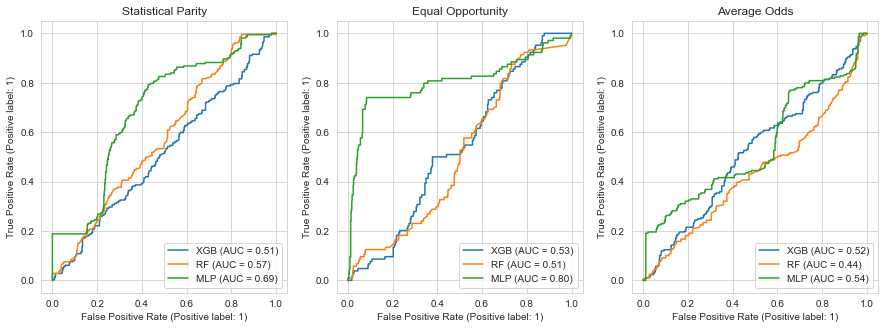

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
RocCurveDisplay.from_predictions(
    test["statistical_parity"], scores_xgb[:, 0], ax=ax[0], name="XGB"
)
RocCurveDisplay.from_predictions(
    test["statistical_parity"], scores_rf[0][:, 1], ax=ax[0], name="RF"
)
RocCurveDisplay.from_predictions(
    test["statistical_parity"], scores_mlp[:, 0], ax=ax[0], name="MLP"
)
ax[0].set_title("Statistical Parity")

RocCurveDisplay.from_predictions(
    test["equal_opportunity"], scores_xgb[:, 1], ax=ax[1], name="XGB"
)
RocCurveDisplay.from_predictions(
    test["equal_opportunity"], scores_rf[1][:, 1], ax=ax[1], name="RF"
)
RocCurveDisplay.from_predictions(
    test["equal_opportunity"], scores_mlp[:, 1], ax=ax[1], name="MLP"
)
ax[1].set_title("Equal Opportunity")

RocCurveDisplay.from_predictions(
    test["average_odds"], scores_xgb[:, 2], ax=ax[2], name="XGB"
)
RocCurveDisplay.from_predictions(
    test["average_odds"], scores_rf[2][:, 1], ax=ax[2], name="RF"
)
RocCurveDisplay.from_predictions(
    test["average_odds"], scores_mlp[:, 2], ax=ax[2], name="MLP"
)
ax[2].set_title("Average Odds")
plt.show()

### Precision Recall Curve

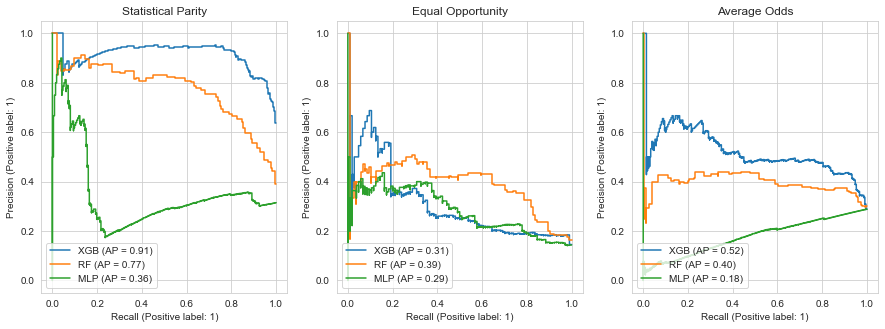

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
PrecisionRecallDisplay.from_predictions(
    test["statistical_parity"], scores_xgb[:, 0], ax=ax[0], name="XGB"
)
PrecisionRecallDisplay.from_predictions(
    test["statistical_parity"], scores_rf[0][:, 1], ax=ax[0], name="RF"
)
PrecisionRecallDisplay.from_predictions(
    test["statistical_parity"], scores_mlp[:, 0], ax=ax[0], name="MLP"
)
ax[0].set_title("Statistical Parity")

PrecisionRecallDisplay.from_predictions(
    test["equal_opportunity"], scores_xgb[:, 1], ax=ax[1], name="XGB"
)
PrecisionRecallDisplay.from_predictions(
    test["equal_opportunity"], scores_rf[1][:, 1], ax=ax[1], name="RF"
)
PrecisionRecallDisplay.from_predictions(
    test["equal_opportunity"], scores_mlp[:, 1], ax=ax[1], name="MLP"
)
ax[1].set_title("Equal Opportunity")

PrecisionRecallDisplay.from_predictions(
    test["average_odds"], scores_xgb[:, 2], ax=ax[2], name="XGB"
)
PrecisionRecallDisplay.from_predictions(
    test["average_odds"], scores_rf[2][:, 1], ax=ax[2], name="RF"
)
PrecisionRecallDisplay.from_predictions(
    test["average_odds"], scores_mlp[:, 2], ax=ax[2], name="MLP"
)
ax[2].set_title("Average Odds")
plt.show()

### Accuracy Comparison

In [69]:
sp_acc_xgb = accuracy_score(test[["statistical_parity"]], predictions_xgb[:, 0])
sp_acc_rf = accuracy_score(test[["statistical_parity"]], predictions_rf[:, 0])
sp_acc_mlp = accuracy_score(test[["statistical_parity"]], predictions_mlp[:, 0])

In [70]:
eo_acc_xgb = accuracy_score(test[["equal_opportunity"]], predictions_xgb[:, 1])
eo_acc_rf = accuracy_score(test[["equal_opportunity"]], predictions_rf[:, 1])
eo_acc_mlp = accuracy_score(test[["equal_opportunity"]], predictions_mlp[:, 1])

In [71]:
ao_acc_xgb = accuracy_score(test[["average_odds"]], predictions_xgb[:, 2])
ao_acc_rf = accuracy_score(test[["average_odds"]], predictions_rf[:, 2])
ao_acc_mlp = accuracy_score(test[["average_odds"]], predictions_mlp[:, 2])

In [93]:
ao_acc_xgb

[0.9930555555555556,
 0.8055555555555556,
 0.7013888888888888,
 0.9375,
 0.8391608391608392]

TypeError: unhashable type: 'list'

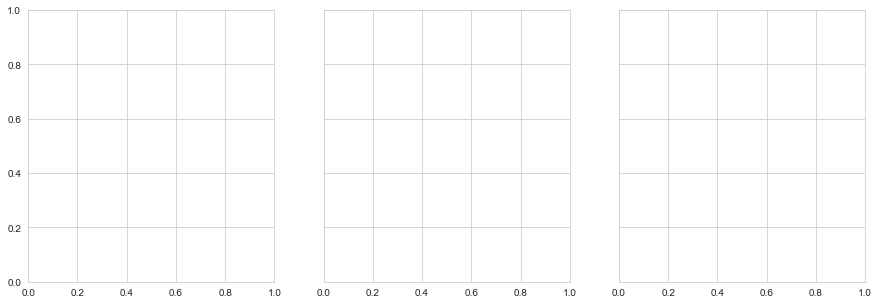

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(
    x=["XGB", "RF", "MLP"],
    y=[sp_acc_xgb, sp_acc_rf, sp_acc_mlp],
    ax=ax[0],
    hue=["XGB", "RF", "MLP"],
)
ax[0].bar_label(ax[0].containers[0], fmt="%.2f")
ax[0].bar_label(ax[0].containers[1], fmt="%.2f")
ax[0].bar_label(ax[0].containers[2], fmt="%.2f")
sns.barplot(
    x=["XGB", "RF", "MLP"],
    y=[eo_acc_xgb, eo_acc_rf, eo_acc_mlp],
    ax=ax[1],
    hue=["XGB", "RF", "MLP"],
)
ax[1].bar_label(ax[1].containers[0], fmt="%.2f")
ax[1].bar_label(ax[1].containers[1], fmt="%.2f")
ax[1].bar_label(ax[1].containers[2], fmt="%.2f")
sns.barplot(
    x=["XGB", "RF", "MLP"],
    y=[ao_acc_xgb, ao_acc_rf, ao_acc_mlp],
    ax=ax[2],
    hue=["XGB", "RF", "MLP"],
)
ax[2].bar_label(ax[2].containers[0], fmt="%.2f")
ax[2].bar_label(ax[2].containers[1], fmt="%.2f")
ax[2].bar_label(ax[2].containers[2], fmt="%.2f")
ax[0].set_title("Statistical Parity")
ax[1].set_title("Equal Opportunity")
ax[2].set_title("Average Odds")
plt.show()